<a href="https://colab.research.google.com/github/tommyEzreal/study_low_level/blob/main/pytorch/%EB%AA%A8%EB%91%90%EB%A5%BC%EC%9C%84%ED%95%9C%EB%94%A5%EB%9F%AC%EB%8B%9D2/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# H(x) in logistic regression = f(Wx+b)

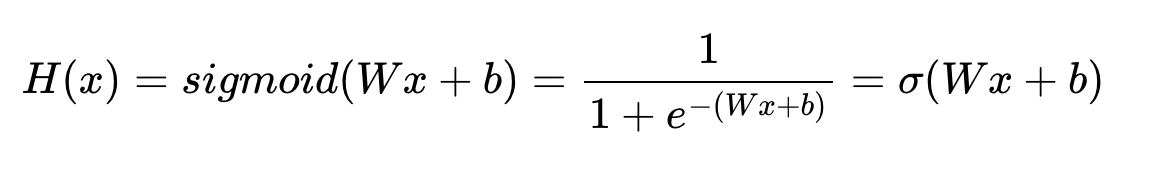

In [9]:
 # define sigmoid 
def sigmoid(x):
  return 1/(1+np.exp(-x))


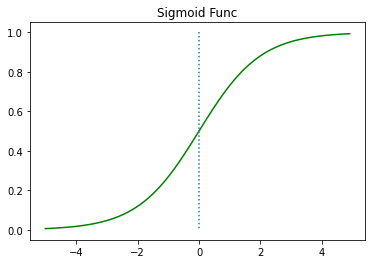

In [10]:
# sigmoid의 영향력 눈으로 확인하기

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x,y,'g')
plt.plot([0,0], [1.0,0.0], ':')
plt.title('Sigmoid Func')
plt.show()

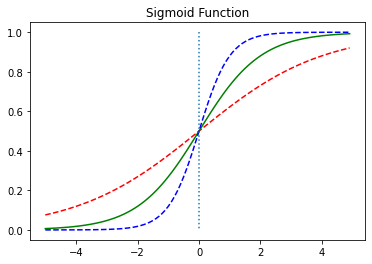

In [11]:
# W 값 변화에 따른 그래프의 변화 

x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5*x) # f(0.5x)
y2 = sigmoid(x) # f(x)
y3 = sigmoid(2*x) # f(2x)

plt.plot(x, y1, 'r', linestyle='--') # W의 값이 0.5일때
plt.plot(x, y2, 'g') # W의 값이 1일때
plt.plot(x, y3, 'b', linestyle='--') # W의 값이 2일때
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

# W값이 증가할수록 그래프가 가파르게 

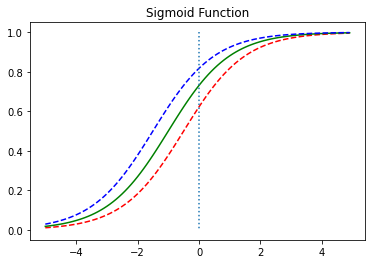

In [12]:
# b값 변화에 따른 그래프변화
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x+0.5) 
y2 = sigmoid(x+1)
y3 = sigmoid(x+1.5)

plt.plot(x, y1, 'r', linestyle='--') # x + 0.5
plt.plot(x, y2, 'g') # x + 1
plt.plot(x, y3, 'b', linestyle='--') # x + 1.5
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

# 절편이동 (그래프의 좌우이동)

In [13]:
# cost function of sigmoid 

import torch
import torch.nn as nn
import torch.nn.functional as F 
import torch.optim as optim 

torch.manual_seed(0)

In [15]:
# data
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)
x_train.shape, y_train.shape

(torch.Size([6, 2]), torch.Size([6, 1]))

In [19]:
# weight and bias
W = torch.zeros((2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
W.shape, b.shape

(torch.Size([2, 1]), torch.Size([1]))

In [20]:
# hypothesis 
h = 1 / (1+torch.exp(-(x_train.matmul(W)+b)))
h 

# or use torch.sigmoid() 

h = torch.sigmoid(x_train.matmul(W)+b)
h

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward0>)

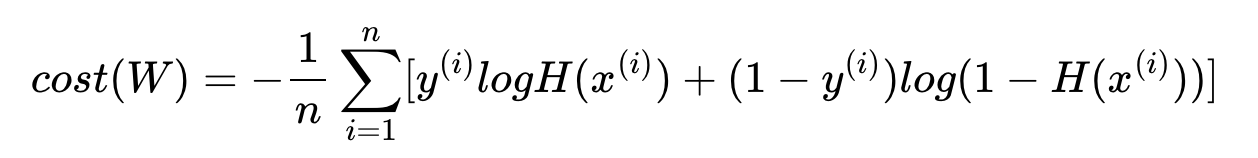

compute loss of sigmoid manually

In [23]:
# loss for one sample 
loss = -(y_train[0] * torch.log(h[0]) + (1-y_train[0]) * torch.log(1-h[0]))
loss

tensor([0.6931], grad_fn=<NegBackward0>)

In [22]:
# loss for all
losses = -(y_train * torch.log(h) + (1-y_train) * torch.log(1-h))
print(losses)

tensor([[0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931]], grad_fn=<NegBackward0>)


In [25]:
# cost function 

cost = losses.mean()
print(cost)

tensor(0.6931, grad_fn=<MeanBackward0>)


use torch.nn.functional 

In [26]:
cost = F.binary_cross_entropy(h, y_train)
cost

tensor(0.6931, grad_fn=<BinaryCrossEntropyBackward0>)

In [28]:
# code trainig loop 

print(x_train.shape, y_train.shape)
print()
print(W.shape, b.shape)

torch.Size([6, 2]) torch.Size([6, 1])

torch.Size([2, 1]) torch.Size([1])


In [31]:
optimizer = torch.optim.SGD([W,b], lr=1)

epochs = 1000
for epoch in range(epochs+1):
  h = torch.sigmoid(x_train.matmul(W)+b)
  cost = F.binary_cross_entropy(h,y_train)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

    # 100번마다 로그 출력
  if epoch % 100 == 0:
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, epochs, cost.item()
        ))

Epoch    0/1000 Cost: 0.693147
Epoch  100/1000 Cost: 0.134722
Epoch  200/1000 Cost: 0.080643
Epoch  300/1000 Cost: 0.057900
Epoch  400/1000 Cost: 0.045300
Epoch  500/1000 Cost: 0.037261
Epoch  600/1000 Cost: 0.031672
Epoch  700/1000 Cost: 0.027556
Epoch  800/1000 Cost: 0.024394
Epoch  900/1000 Cost: 0.021888
Epoch 1000/1000 Cost: 0.019852


In [33]:
# prediction with trained model 
print("h:", h)
print()

# threshold 0.5
pred = h >= torch.FloatTensor([0.5])
print("pred:",pred)

h: tensor([[2.7711e-04],
        [3.1636e-02],
        [3.9014e-02],
        [9.5618e-01],
        [9.9823e-01],
        [9.9969e-01]], grad_fn=<SigmoidBackward0>)

pred: tensor([[False],
        [False],
        [False],
        [ True],
        [ True],
        [ True]])


use nn.Module 

In [34]:
# input feature 2, output f 1, go into sigmoid 
model = nn.Sequential(nn.Linear(2,1), nn.Sigmoid())

# default prediction
model(x_train)


tensor([[0.5427],
        [0.6331],
        [0.4456],
        [0.6306],
        [0.6294],
        [0.5362]], grad_fn=<SigmoidBackward0>)

In [35]:
optimizer = torch.optim.SGD(model.parameters(), lr=1)

epochs = 1000
for epoch in range(epochs+1):
  h = model(x_train)
  cost = F.binary_cross_entropy(h,y_train)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 100 == 0:
    # thre = 0.5
    pred = h >= torch.FloatTensor([0.5])

    # 실제값과 일치하면 true 
    correct_pred = pred.float() == y_train

    # compute acc
    acc = correct_pred.sum().item() / len(correct_pred) 

    print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format( # 각 에포크마다 정확도를 출력
            epoch, epochs, cost.item(), acc * 100,
        ))

Epoch    0/1000 Cost: 0.653724 Accuracy 66.67%
Epoch  100/1000 Cost: 0.129119 Accuracy 100.00%
Epoch  200/1000 Cost: 0.078651 Accuracy 100.00%
Epoch  300/1000 Cost: 0.056883 Accuracy 100.00%
Epoch  400/1000 Cost: 0.044681 Accuracy 100.00%
Epoch  500/1000 Cost: 0.036844 Accuracy 100.00%
Epoch  600/1000 Cost: 0.031372 Accuracy 100.00%
Epoch  700/1000 Cost: 0.027329 Accuracy 100.00%
Epoch  800/1000 Cost: 0.024217 Accuracy 100.00%
Epoch  900/1000 Cost: 0.021746 Accuracy 100.00%
Epoch 1000/1000 Cost: 0.019735 Accuracy 100.00%


In [36]:
# new prediction on training data
model(x_train)

tensor([[2.7247e-04],
        [3.1432e-02],
        [3.8745e-02],
        [9.5646e-01],
        [9.9825e-01],
        [9.9969e-01]], grad_fn=<SigmoidBackward0>)

with Class

In [52]:
class BinaryClassifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(2,1) # input dim2, output dim1
    self.sigmoid = nn.Sigmoid() # go through Sigmoid 

  def forward(self,x):
    return self.sigmoid(self.linear(x))

In [53]:
# define model object 
model = BinaryClassifier()

In [55]:
# optim 
optimizer = torch.optim.SGD(model.parameters(), lr =1)

epochs = 1000
for epoch in range(epochs+1):
  h = model(x_train)
  cost = F.binary_cross_entropy(h,y_train)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 10 == 0:
    prediction = h >= torch.FloatTensor([0.5]) # 예측값이 0.5를 넘으면 True로 간주
    correct_prediction = prediction.float() == y_train # 실제값과 일치하는 경우만 True로 간주
    acc = correct_prediction.sum().item() / len(correct_prediction) # 정확도를 계산
    print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format( # 각 에포크마다 정확도를 출력
            epoch, epochs, cost.item(), acc * 100,
        ))

Epoch    0/1000 Cost: 2.607774 Accuracy 50.00%
Epoch   10/1000 Cost: 0.630933 Accuracy 83.33%
Epoch   20/1000 Cost: 0.563599 Accuracy 83.33%
Epoch   30/1000 Cost: 0.469284 Accuracy 83.33%
Epoch   40/1000 Cost: 0.384240 Accuracy 83.33%
Epoch   50/1000 Cost: 0.303840 Accuracy 83.33%
Epoch   60/1000 Cost: 0.232557 Accuracy 83.33%
Epoch   70/1000 Cost: 0.180864 Accuracy 100.00%
Epoch   80/1000 Cost: 0.154924 Accuracy 100.00%
Epoch   90/1000 Cost: 0.142482 Accuracy 100.00%
Epoch  100/1000 Cost: 0.132900 Accuracy 100.00%
Epoch  110/1000 Cost: 0.124567 Accuracy 100.00%
Epoch  120/1000 Cost: 0.117237 Accuracy 100.00%
Epoch  130/1000 Cost: 0.110737 Accuracy 100.00%
Epoch  140/1000 Cost: 0.104934 Accuracy 100.00%
Epoch  150/1000 Cost: 0.099722 Accuracy 100.00%
Epoch  160/1000 Cost: 0.095015 Accuracy 100.00%
Epoch  170/1000 Cost: 0.090743 Accuracy 100.00%
Epoch  180/1000 Cost: 0.086848 Accuracy 100.00%
Epoch  190/1000 Cost: 0.083281 Accuracy 100.00%
Epoch  200/1000 Cost: 0.080003 Accuracy 100.00%